In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
ds=pd.read_csv(r'C:\Users\DELL\Downloads\Spotify\spotify-2023.csv',encoding='ISO-8859-1')

In [29]:
ds

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [30]:
ds.shape

(953, 24)

In [31]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [32]:
ds.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [33]:
ds=ds.drop(['in_apple_playlists','in_apple_charts','in_deezer_playlists','in_deezer_charts','in_shazam_charts','key'], axis=1)

In [34]:
ds.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
bpm                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [40]:
ds["streams"] = pd.to_numeric(ds["streams"],errors='coerce')

In [45]:
#Top 10 streamed songs of 2023
top10=ds.sort_values(by=["streams"],ascending=False).head(10)

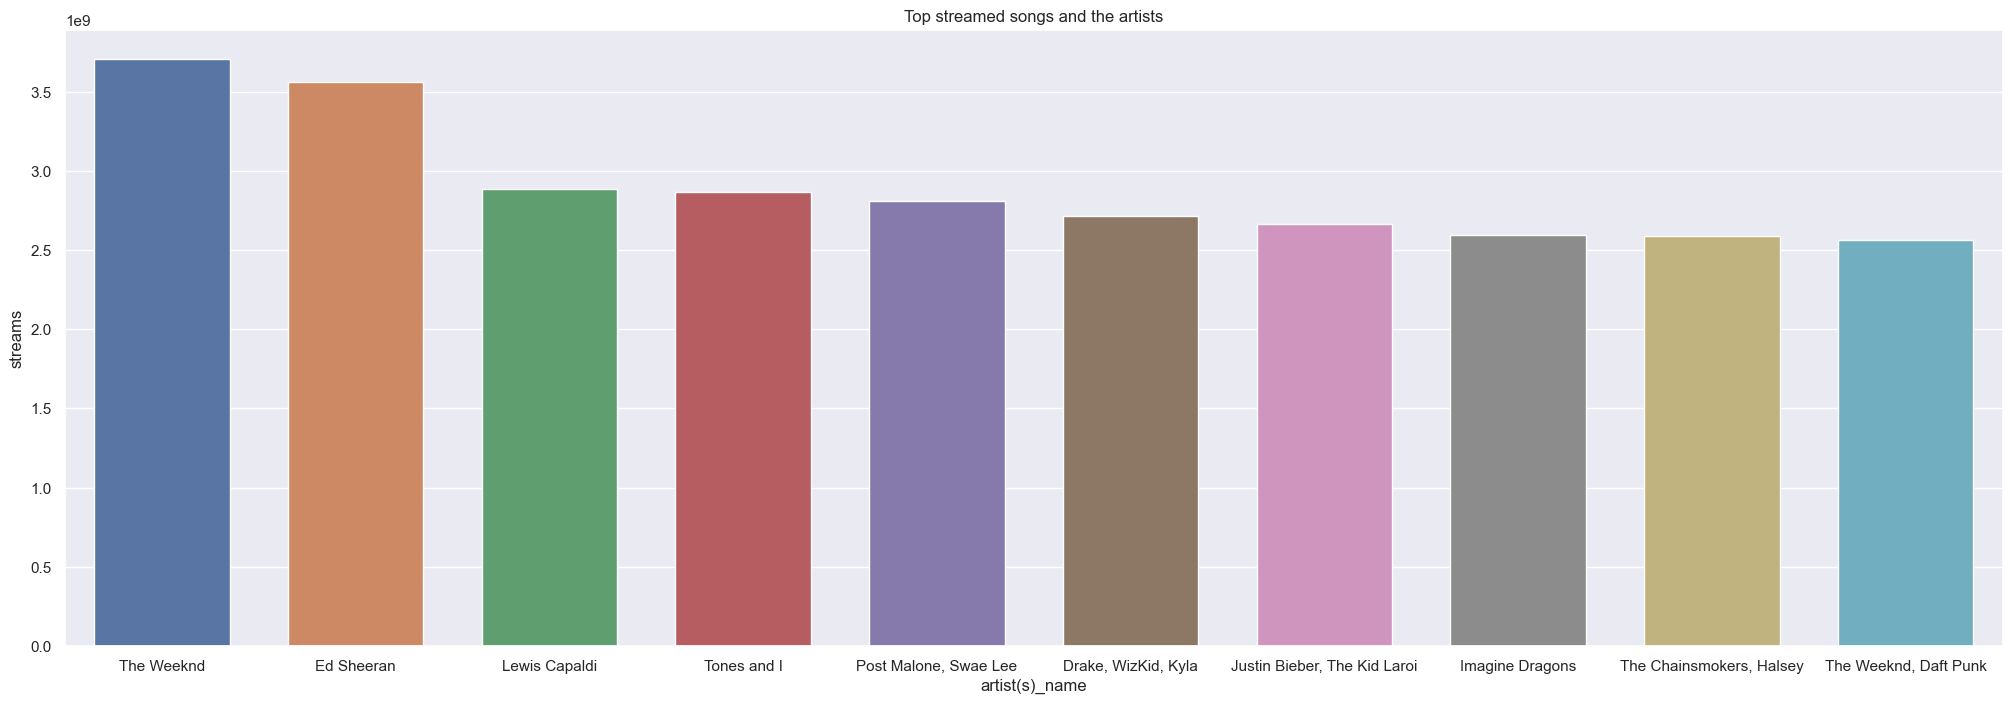

In [66]:
#Plot top 10 streamed songs

width = 25
height = 8
sns.set(rc = {'figure.figsize':(width,height)})

sns.barplot(x ="artist(s)_name" ,
            y = "streams",
            data = top10,dodge=2,width=0.7)
plt.title("Top streams and the artists")

# Show the plot
plt.show()

In [60]:
#Top streamed artists
ds["artist(s)_name"] = ds['artist(s)_name'].str.split(',')
df_exploded = ds.explode('artist(s)_name')
#renaming the column
df_exploded.rename(columns={"artist(s)_name":"artist_name"},inplace=True)
df_exploded["artist_name"]=df_exploded["artist_name"].astype(str)
df_exploded.dtypes

track_name               object
artist_name              object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
bpm                       int64
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [62]:
df_exploded["artist_name"]=df_exploded["artist_name"].str.lstrip()

In [63]:
artist_streams = df_exploded.groupby('artist_name')['streams'].sum().sort_values(ascending=False)
artist_streams.head(10)

artist_name
The Weeknd       2.392976e+10
Bad Bunny        2.381353e+10
Ed Sheeran       1.531659e+10
Taylor Swift     1.463038e+10
Harry Styles     1.160865e+10
Eminem           1.019373e+10
Dua Lipa         9.980020e+09
Justin Bieber    8.243081e+09
Drake            8.043031e+09
BTS              7.780428e+09
Name: streams, dtype: float64

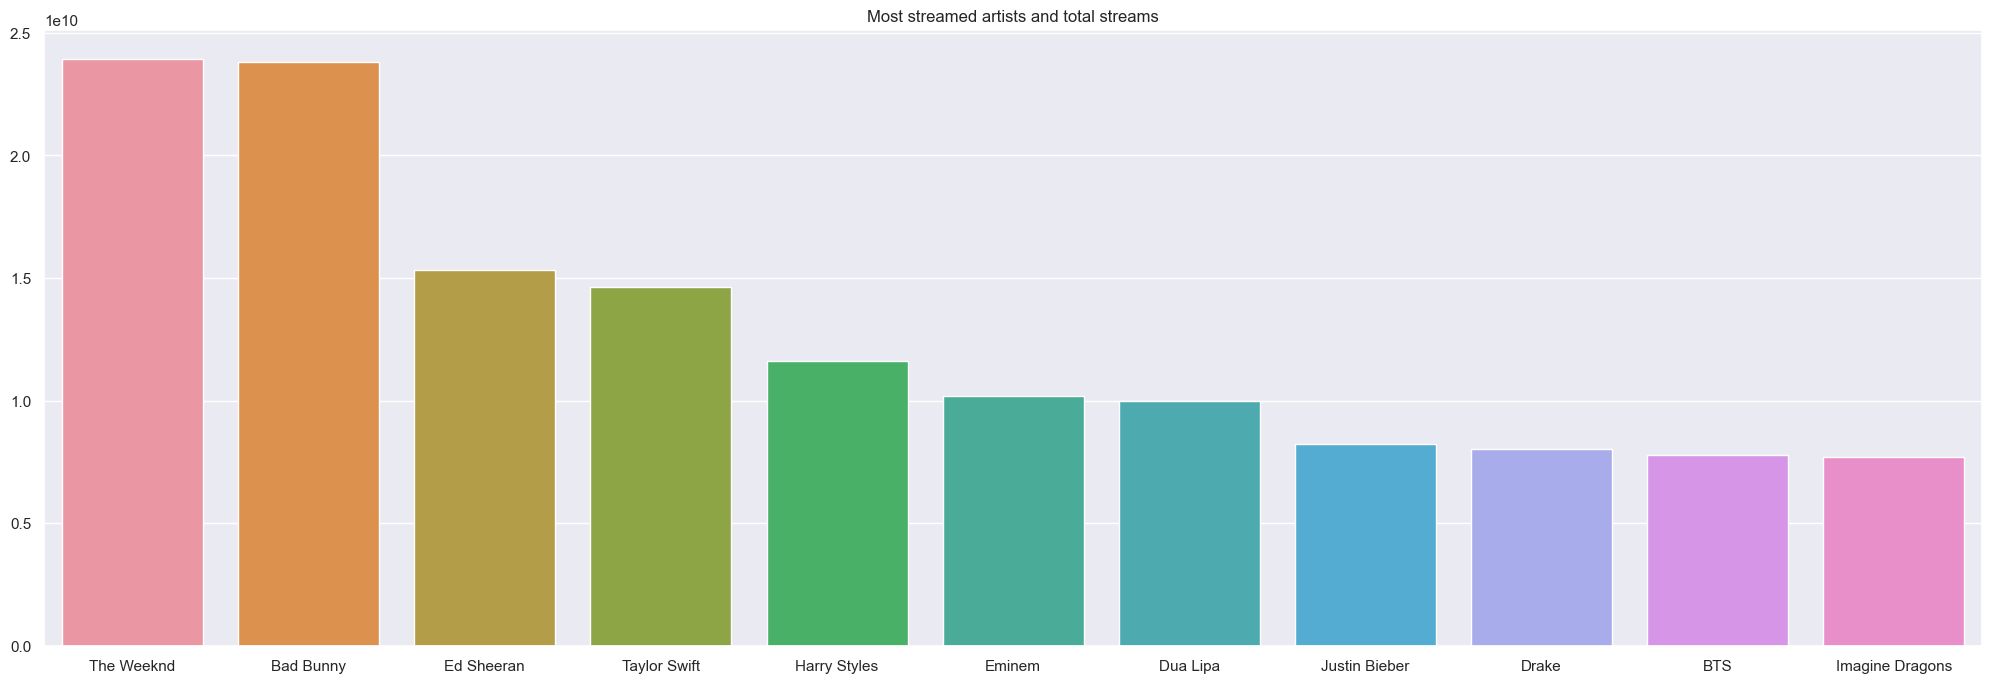

In [67]:
width = 25
height = 8
sns.set(rc = {'figure.figsize':(width,height)})

sns.barplot(x=artist_streams.index.tolist()[:11],y=artist_streams.values.tolist()[:11])
plt.title("Most streamed artists and total streams")
# Show the plot
plt.show()

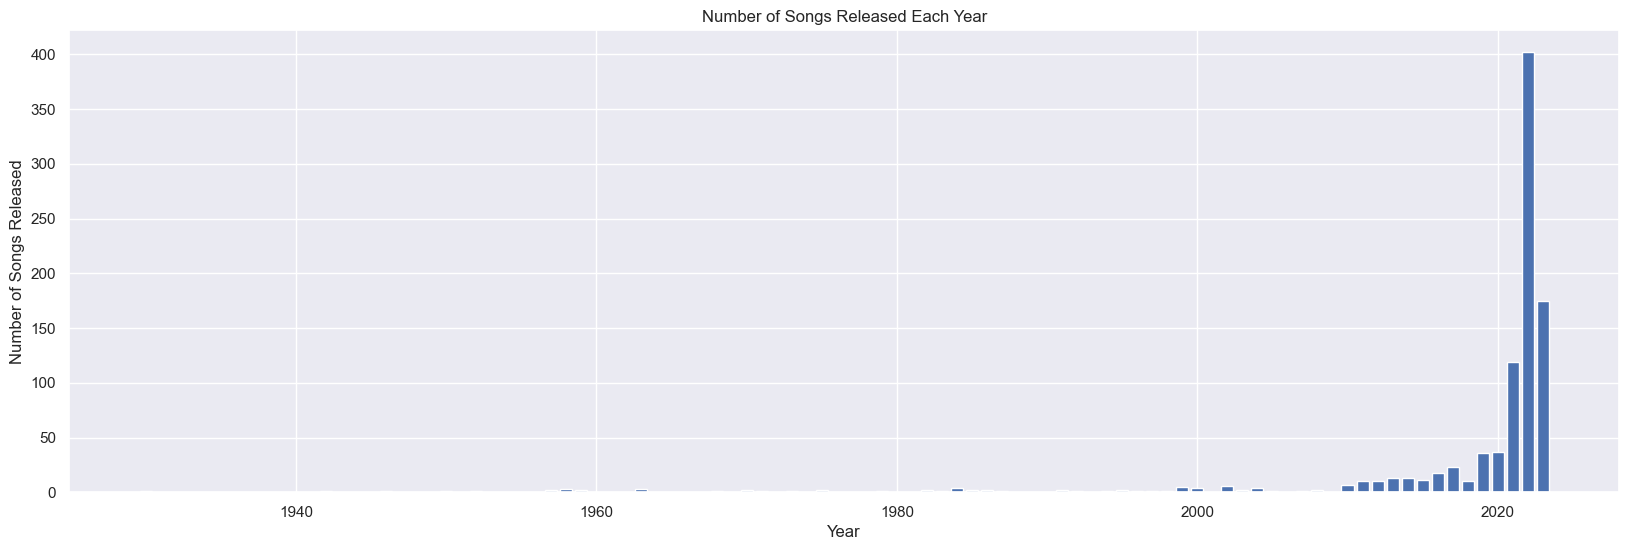

In [74]:
# Number of songs released each year

songs_by_year = ds.groupby('released_year').size().reset_index(name='track_name')

plt.figure(figsize=(20, 6))
plt.bar(songs_by_year['released_year'], songs_by_year['track_name'])
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.title('Number of Songs Released Each Year')
plt.show()

In [76]:
#Distribution of Artists

unique_arr = ds["artist_count"].unique()
unique_arr

array([2, 1, 3, 8, 4, 5, 6, 7], dtype=int64)

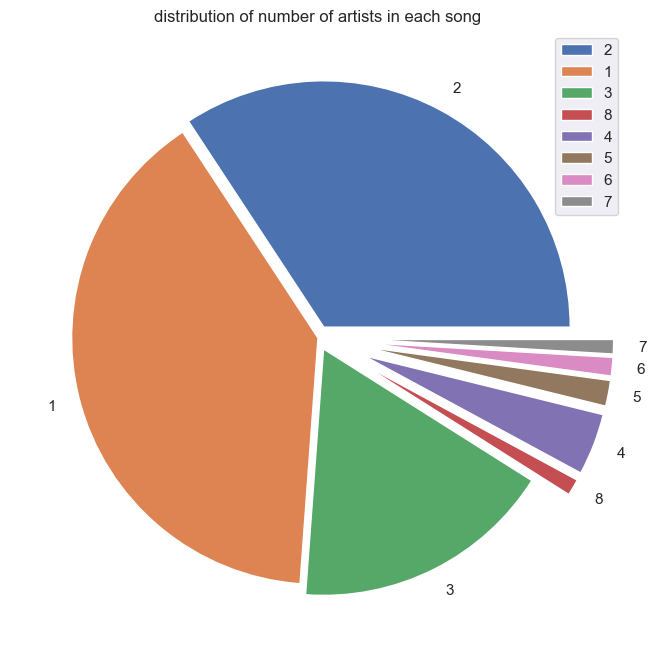

In [78]:
pie_arr=[]
for i in unique_arr:
    pie_arr.append(ds.loc[ds["artist_count"]==i]["artist_count"].sum().tolist())
labels = unique_arr
explode = [0.05,0,0.05,0.2,0.2,0.2,0.2,0.2]
plt.pie(pie_arr,labels = labels,explode = explode)
plt.title("distribution of number of artists in each song")
plt.legend()
plt.show()

In [80]:
topdance=ds.sort_values(by=["danceability_%"],ascending=False).head(10)
topdance

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
595,Peru,"[Ed Sheeran, Fireboy DML]",2,2021,12,23,2999,0,2.612865e+08,108,Minor,96,71,42,57,0,8,9
224,Players,[Coi Leray],1,2022,11,30,4096,6,3.350748e+08,105,Major,95,62,52,3,0,5,16
250,The Real Slim Shady,[Eminem],1,2000,1,1,20763,27,1.424590e+09,104,Minor,95,78,66,3,0,4,6
423,Super Freaky Girl,[Nicki Minaj],1,2022,8,12,4827,0,4.286857e+08,133,Major,95,91,89,6,0,31,24
702,Starlight,[Dave],1,2022,3,3,1856,3,2.294733e+08,124,Major,95,36,37,35,0,10,28
321,CAIRO,"[Karol G, Ovy On The Drums]",2,2022,11,13,2418,26,2.943521e+08,115,Minor,95,43,69,47,0,9,31
876,Ai Preto,"[L7nnon, DJ Biel do Furduncinho, Bianca]",3,2022,6,3,894,4,1.761039e+08,130,Major,95,83,57,54,0,10,25
268,Slut Me Out,[NLE Choppa],1,2022,4,22,816,4,1.904909e+08,121,Minor,94,71,61,12,0,53,42
943,Privileged Rappers,"[Drake, 21 Savage]",2,2022,11,4,1007,0,1.124364e+08,144,Major,93,62,61,0,0,12,20
142,"Gol Bolinha, Gol Quadrado 2","[Mc Pedrinho, DJ 900]",2,2023,6,1,293,8,1.195664e+07,133,Minor,93,68,65,42,0,12,25


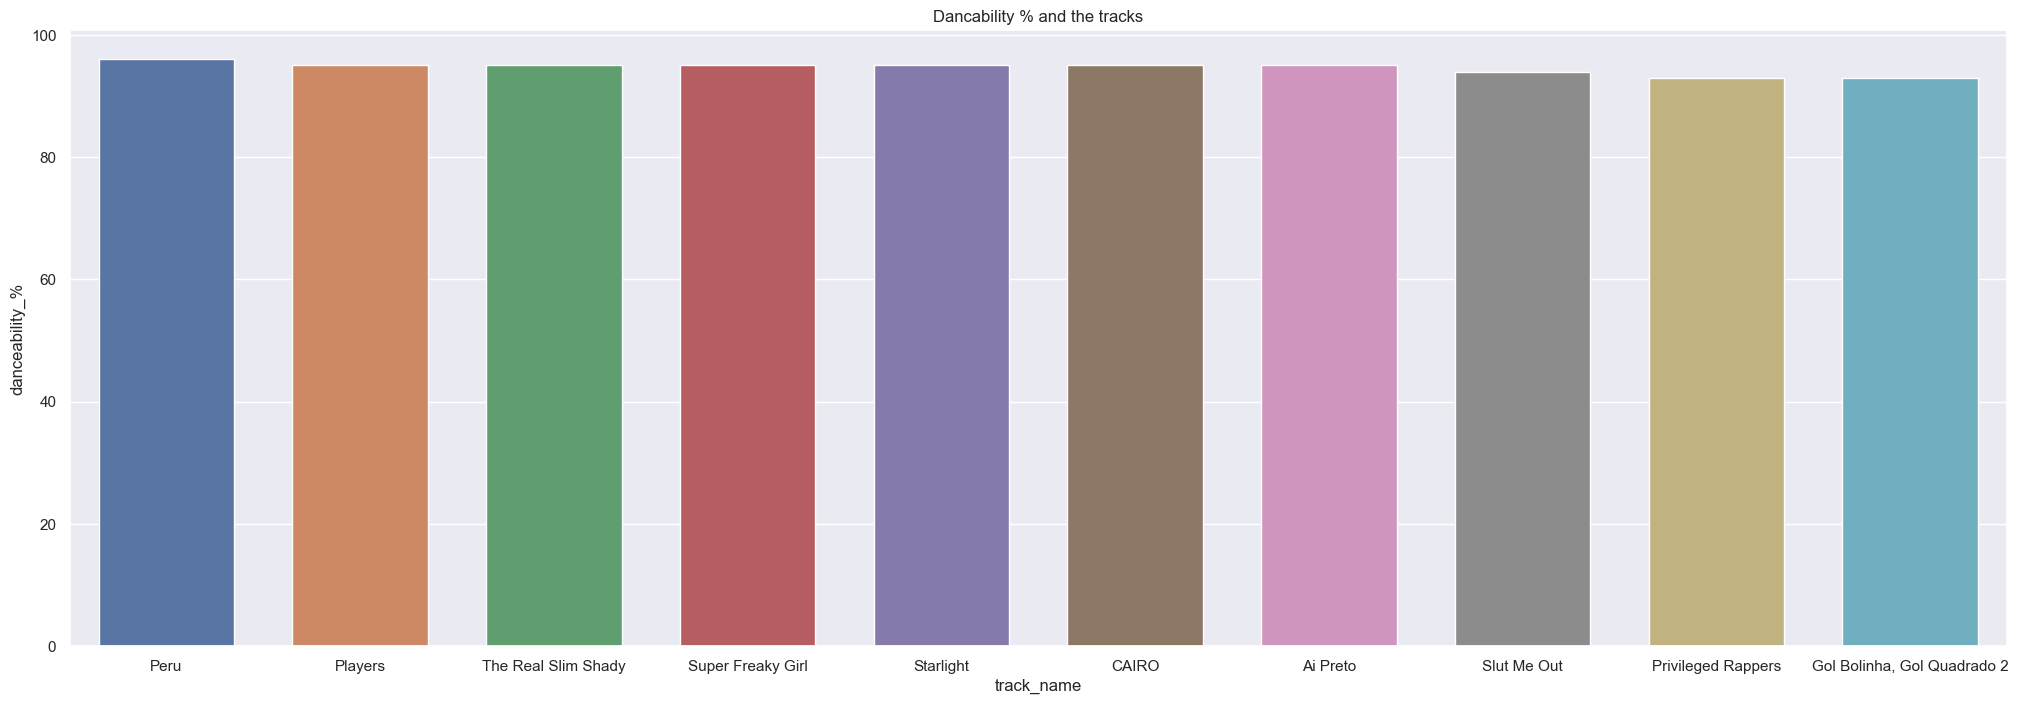

In [83]:
#Plot top 10 dancable songs

width = 25
height = 8
sns.set(rc = {'figure.figsize':(width,height)})

sns.barplot(x ="track_name" ,
            y = "danceability_%",
            data = topdance,dodge=2,width=0.7)
plt.title("Dancability % and the tracks")

# Show the plot
plt.show()

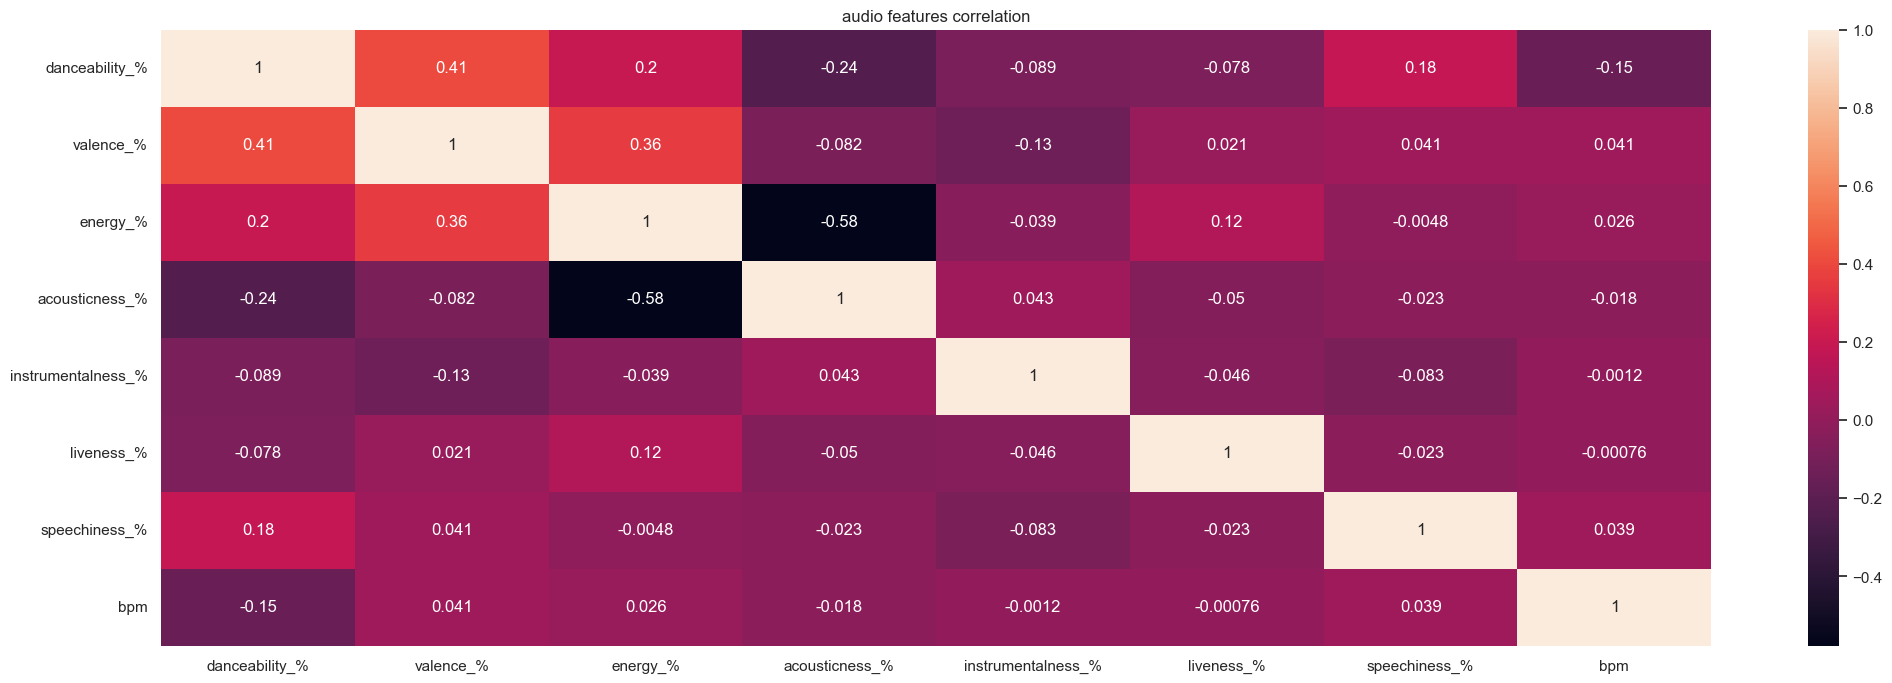

In [84]:
#Correlation between audio features

feature_columns = ["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%", 'bpm']
feature_matrix = ds[feature_columns].corr()
sns.heatmap(feature_matrix,annot = True)
plt.title("audio features correlation")
plt.show()